<a href="https://colab.research.google.com/github/Jair2472/Proyecto_Prediccion_MargenBruto/blob/main/EDA/Visualizacion_de_Datos1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Transformando 'IngresosAcum' a valores positivos...
Generando los gráficos de caja...


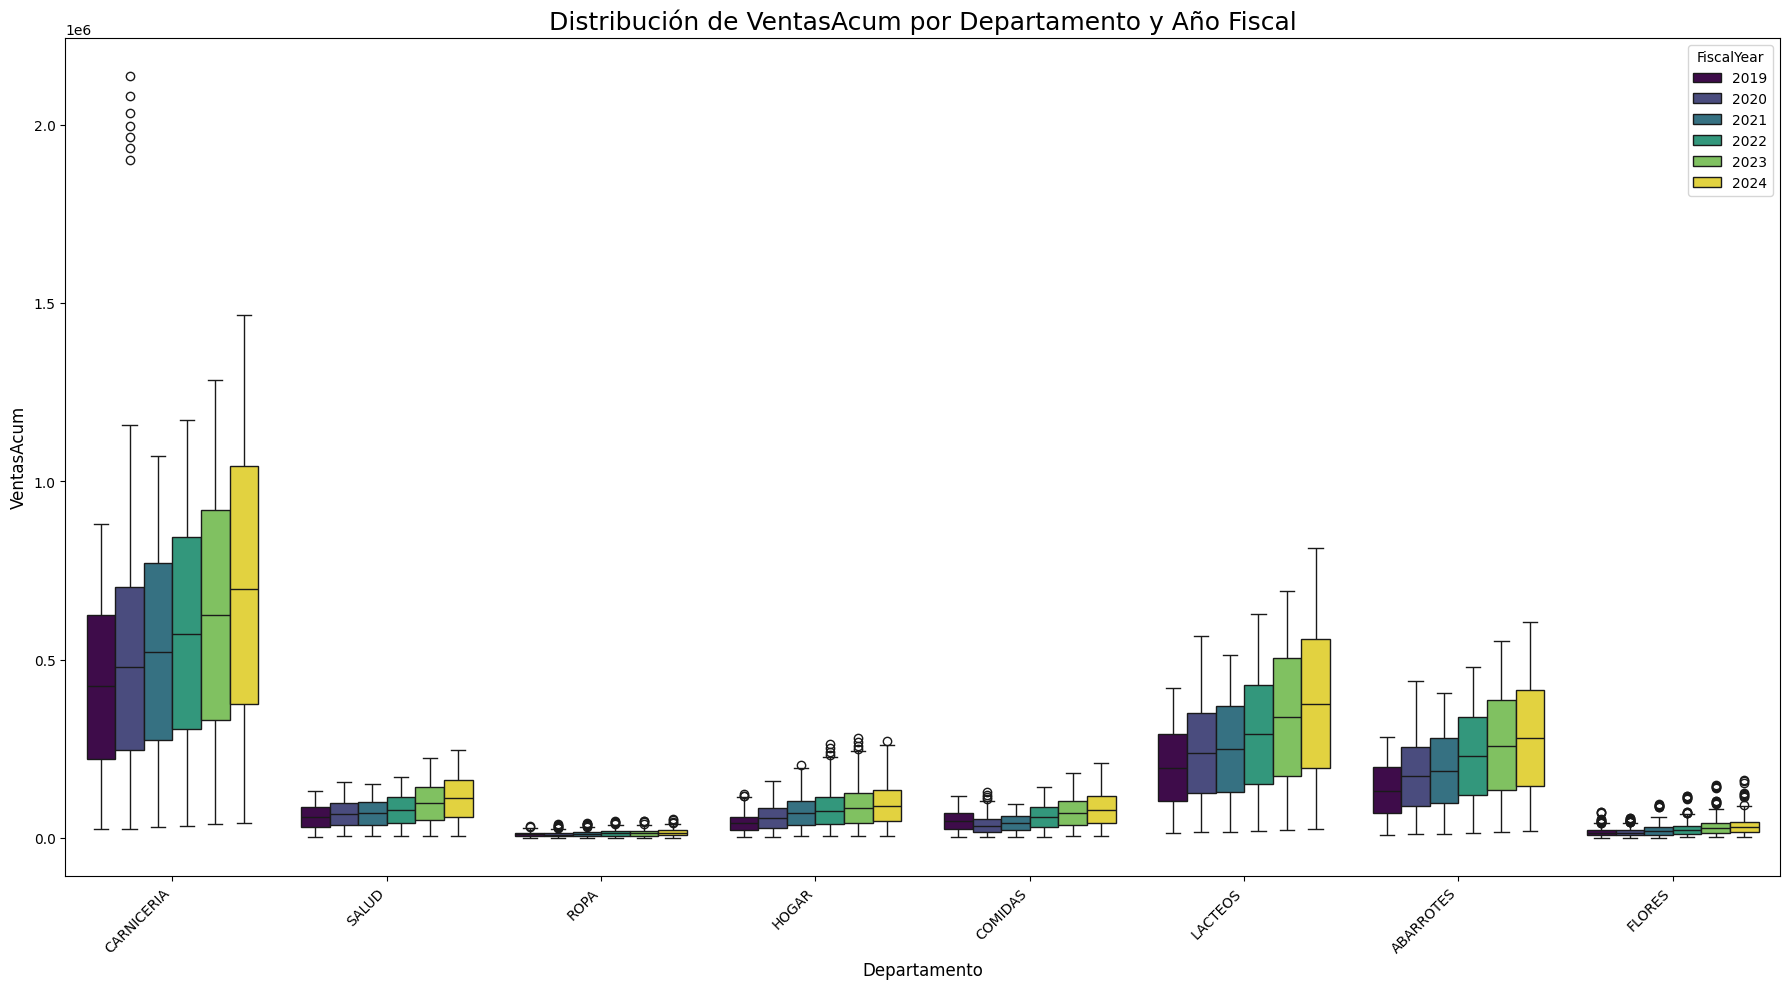

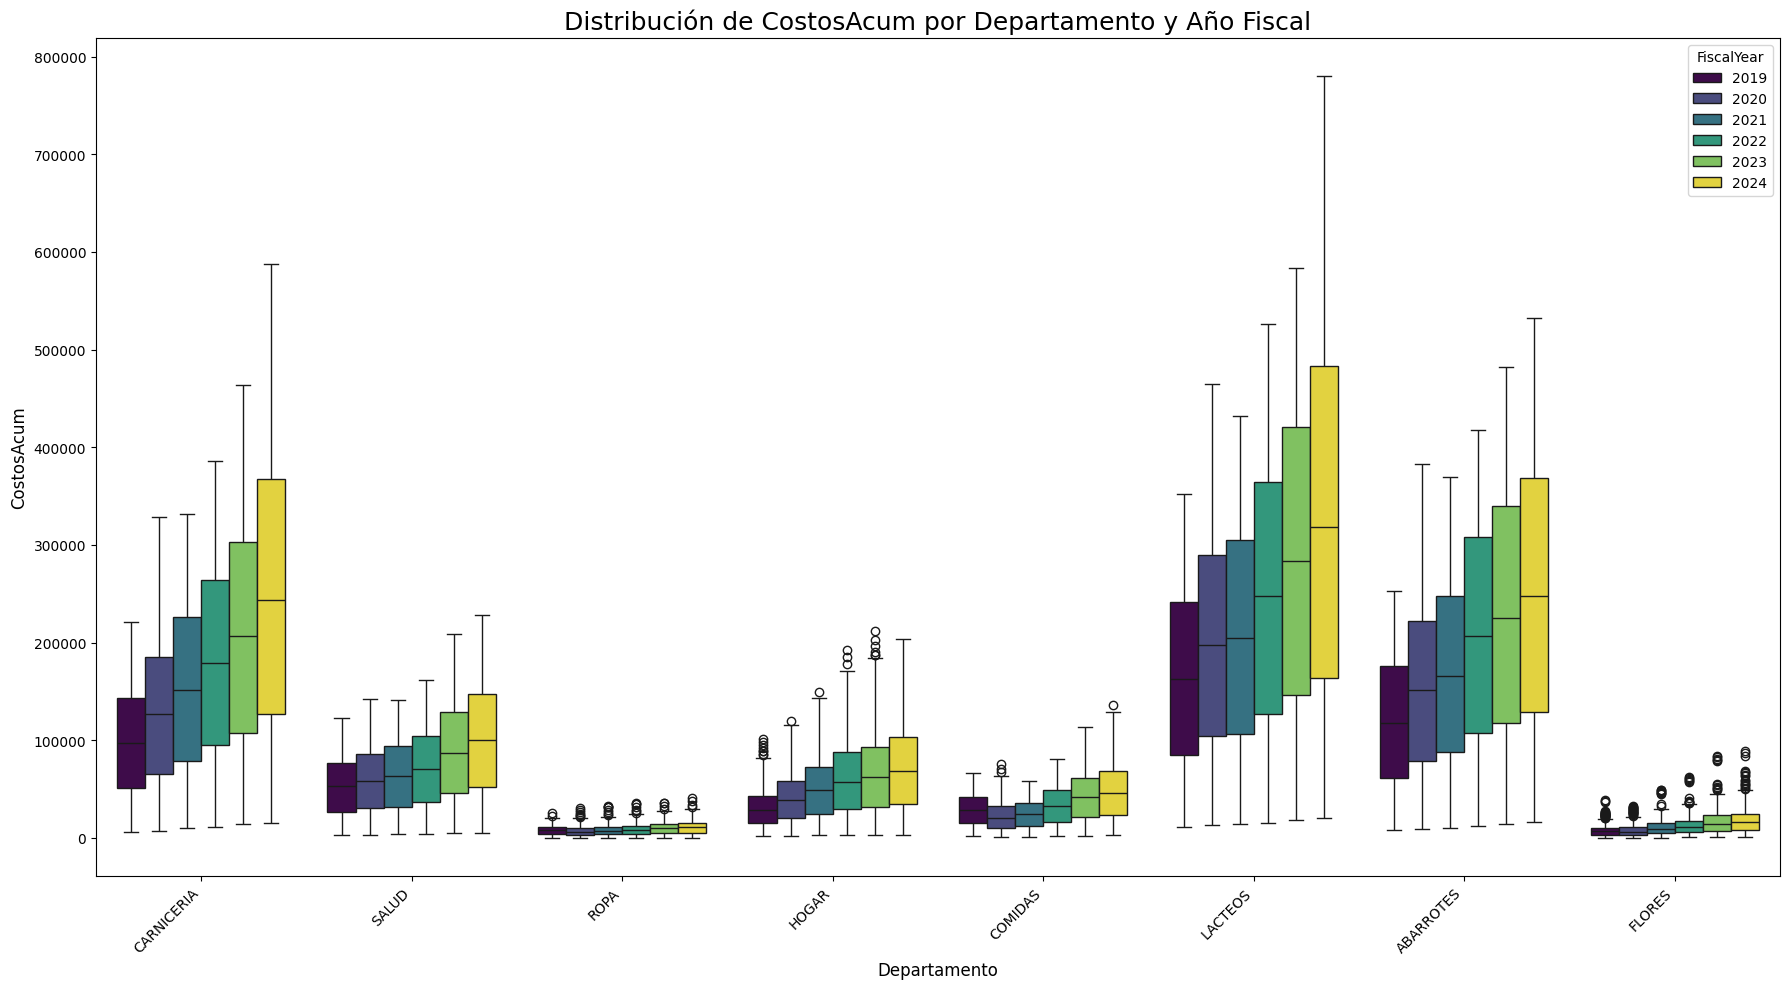

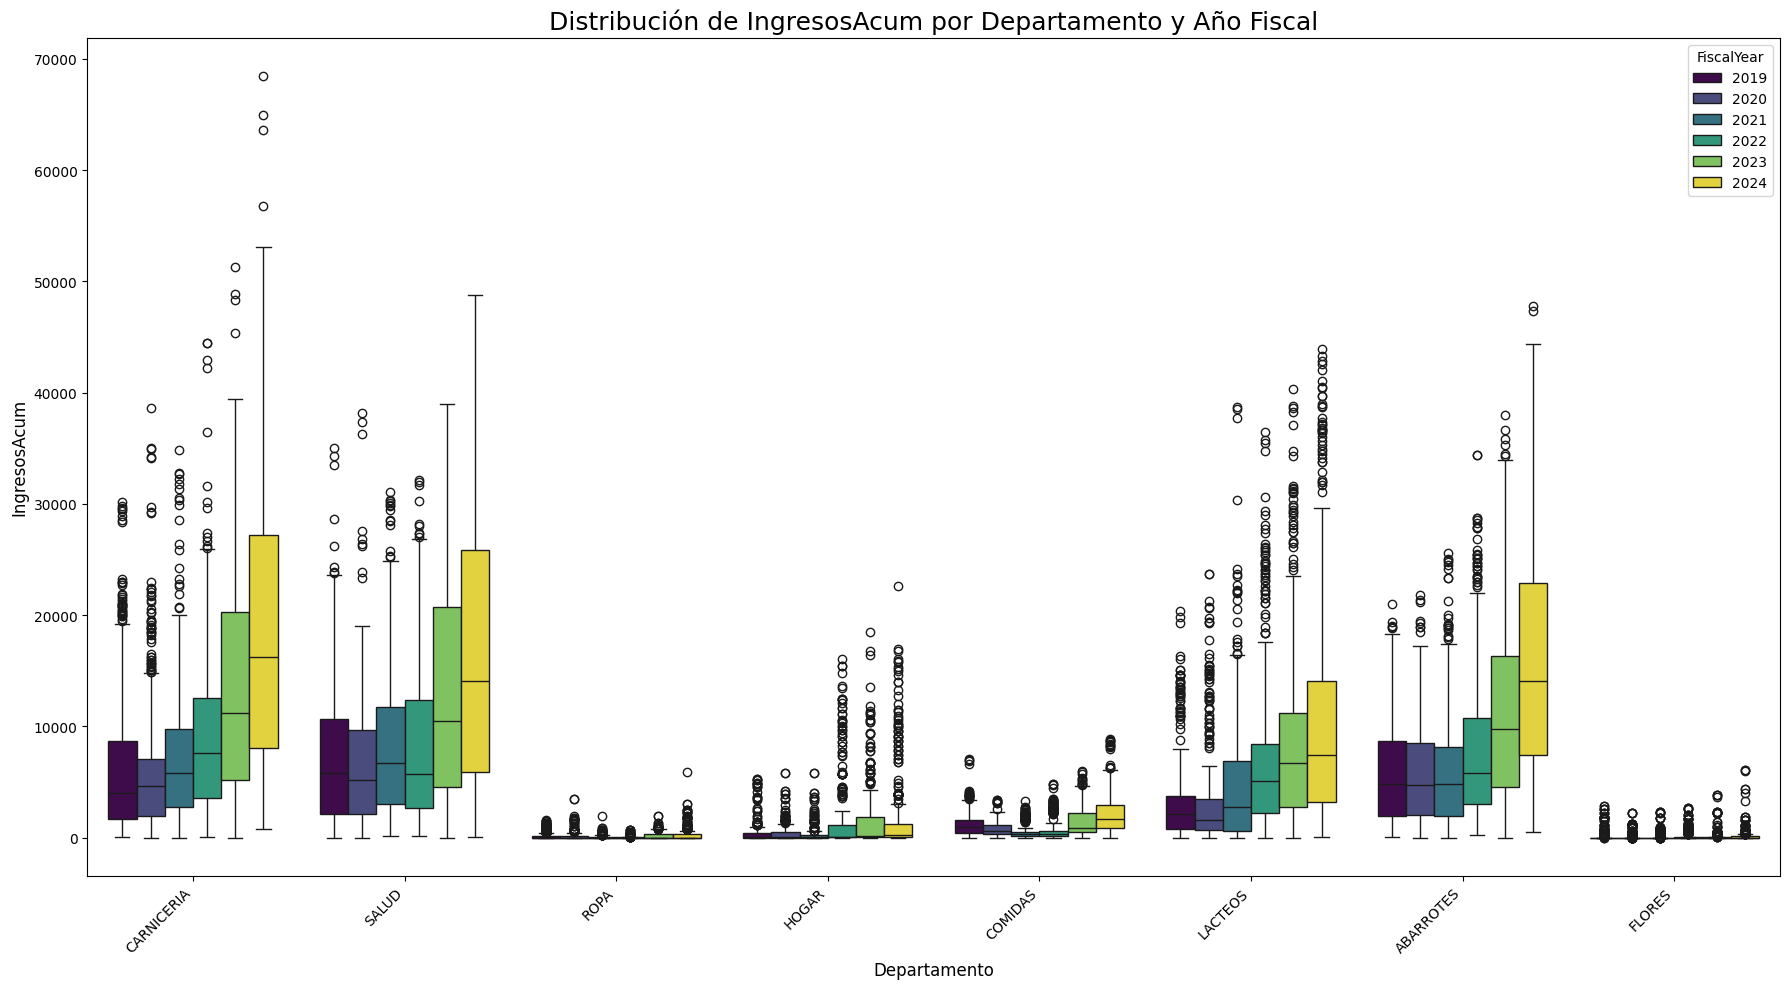

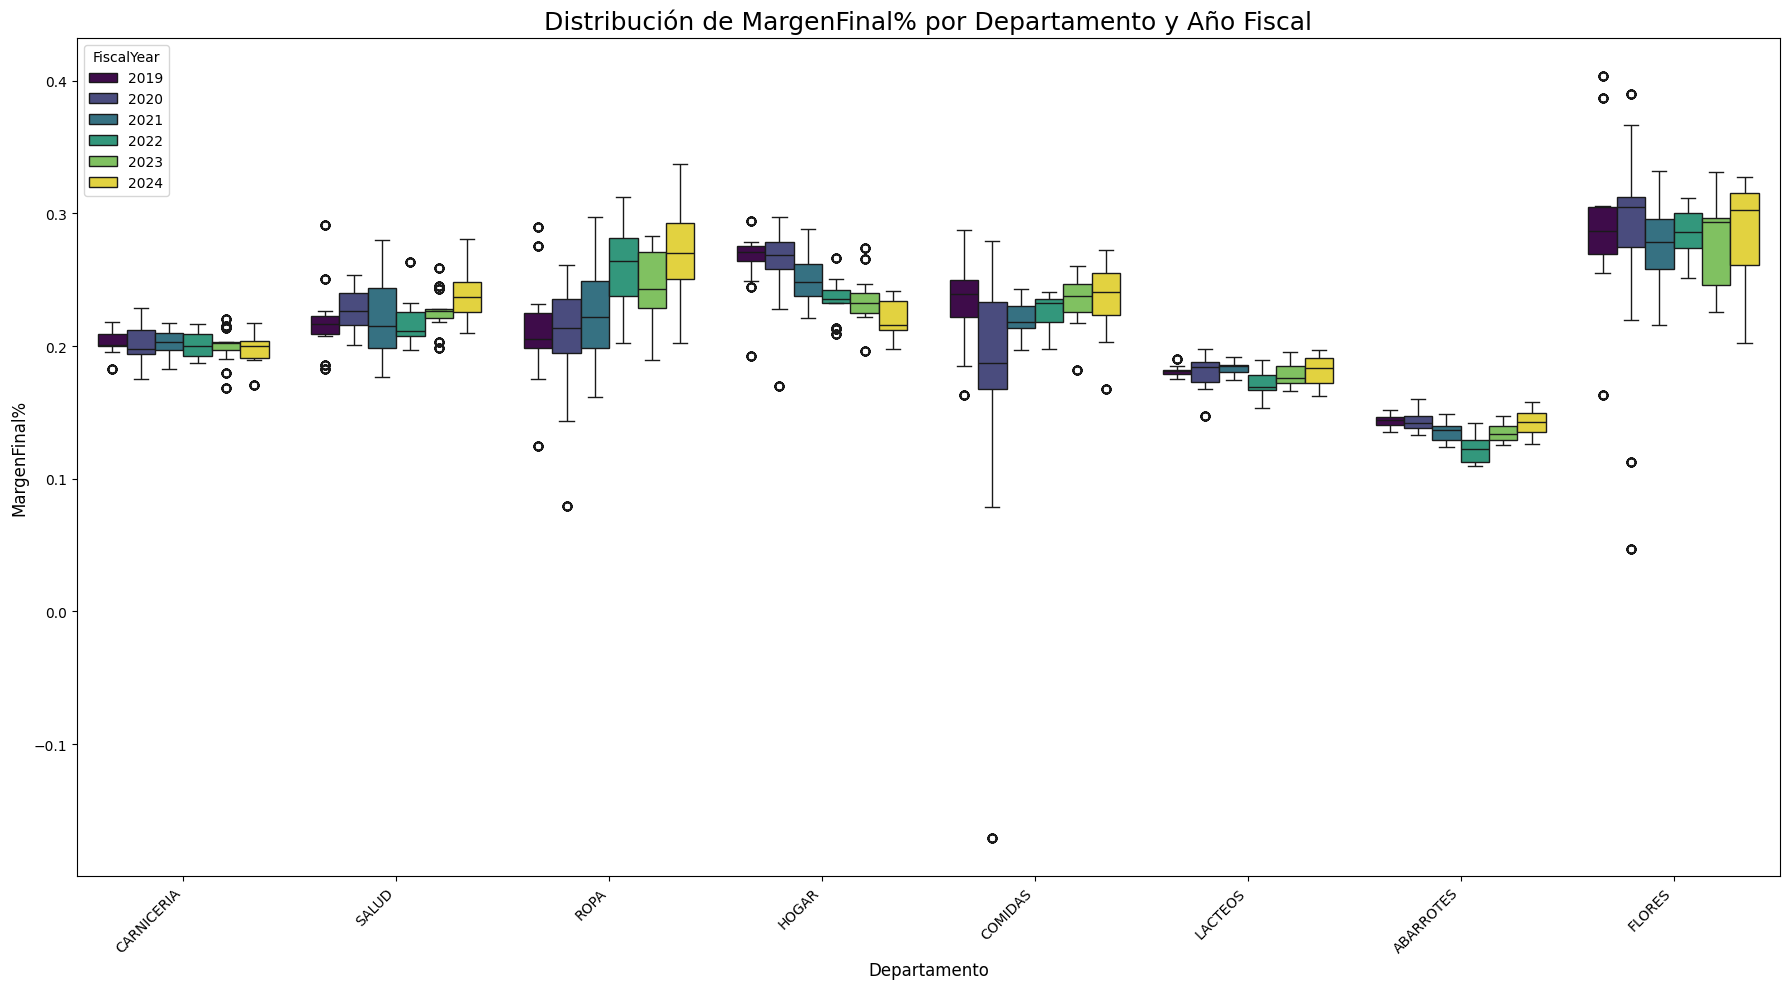


¡Análisis completado! Se han generado los gráficos.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

try:
    # Intenta cargar el archivo que proporcionarás
    df = pd.read_csv('/content/dataset_corregido.csv')

    # Usamos .abs() para obtener el valor absoluto.
    print("Transformando 'IngresosAcum' a valores positivos...")
    df['IngresosAcum'] = df['IngresosAcum'].abs()

    # Definimos las variables que queremos analizar
    variables_numericas = ['VentasAcum', 'CostosAcum', 'IngresosAcum', 'MargenFinal%']

    print("Generando los gráficos de caja...")

    # Generamos un bucle para generar un gráfico para cada variable numérica
    for variable in variables_numericas:

        # Configuramos el tamaño de la figura para que sea grande y legible
        plt.figure(figsize=(18, 10))
        sns.boxplot(data=df, x='NameDept', y=variable, hue='FiscalYear', palette='viridis')

        # Añadimos títulos y etiquetas para que el gráfico se entienda bien
        plt.title(f'Distribución de {variable} por Departamento y Año Fiscal', fontsize=18)
        plt.xlabel('Departamento', fontsize=12)
        plt.ylabel(variable, fontsize=12)

        # Rotamos las etiquetas del eje X para que no se empalmen
        plt.xticks(rotation=45, ha='right')

        # Ajustamos el diseño para que todo quepa correctamente
        plt.tight_layout()

        # Mostramos el gráfico
        plt.show()

    print("\n¡Análisis completado! Se han generado los gráficos.")

except FileNotFoundError:
    print("Error: No se encontró el archivo 'csv'.")
except KeyError as e:
    print(f"Error de columna: No se encontró la columna {e} en el archivo.")



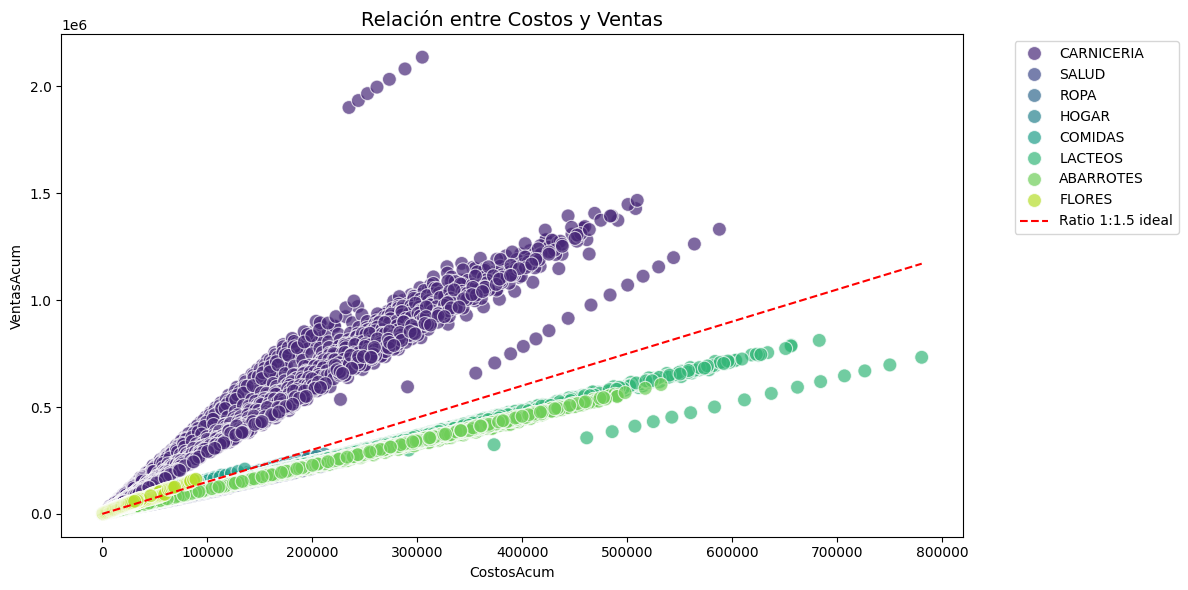

In [ ]:
# Gráfico Relación Costo-Venta por periodo y año fiscal
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='CostosAcum', y='VentasAcum', hue='NameDept',
                palette="viridis", s=100, alpha=0.7)
plt.title('Relación entre Costos y Ventas', fontsize=14)
plt.plot([0, df['CostosAcum'].max()], [0, df['CostosAcum'].max()*1.5],
         'r--', label='Ratio 1:1.5 ideal')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

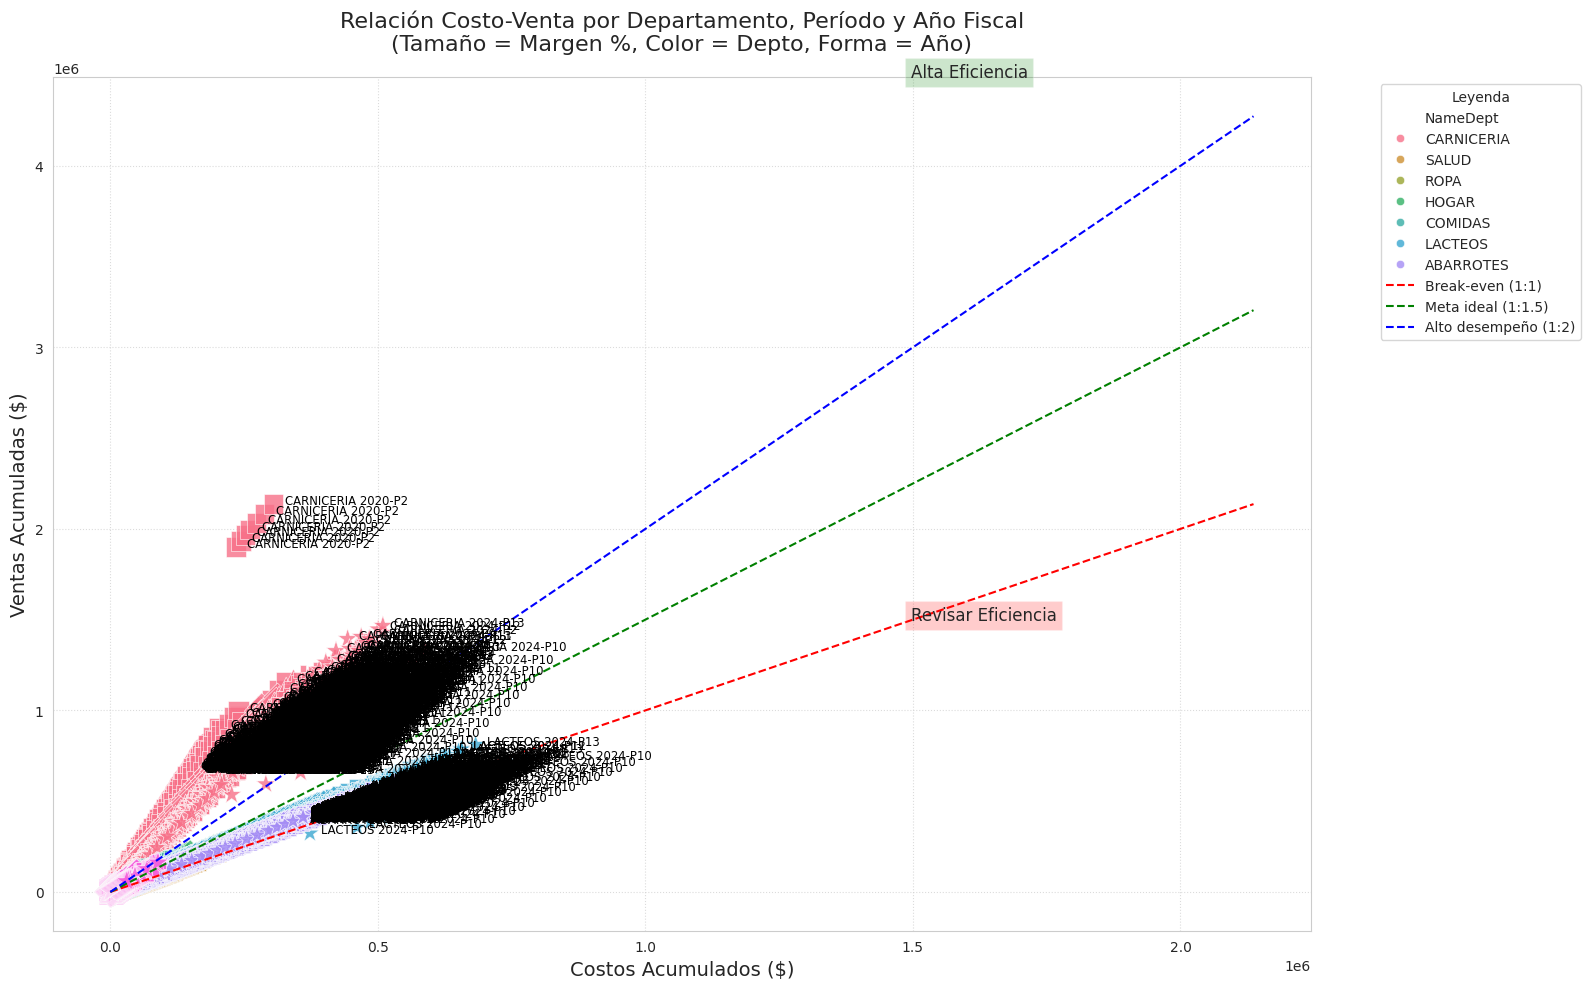

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración profesional
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")

# Crear variable combinada Año-Período
df['Año_Periodo'] = df['FiscalYear'].astype(str) + '-P' + df['Period'].astype(str)

# Scatterplot mejorado
scatter = sns.scatterplot(
    data=df,
    x='CostosAcum',
    y='VentasAcum',
    hue='NameDept',
    size='MargenFinal%',  # Tamaño por margen de ganancia
    sizes=(50, 300),  # Rango de tamaños
    alpha=0.8,
    palette="husl",
    style='FiscalYear',  # Diferenciar años por marcador
    markers=['o', 's', 'D', '^', 'P', '*'],  # Marcadores distintos por año
    edgecolor='w',
    linewidth=0.5
)

# Líneas de referencia mejoradas
max_val = max(df['CostosAcum'].max(), df['VentasAcum'].max())
plt.plot([0, max_val], [0, max_val*1.0], 'r--', label='Break-even (1:1)', linewidth=1.5)
plt.plot([0, max_val], [0, max_val*1.5], 'g--', label='Meta ideal (1:1.5)', linewidth=1.5)
plt.plot([0, max_val], [0, max_val*2.0], 'b--', label='Alto desempeño (1:2)', linewidth=1.5)

# Añadir etiquetas a puntos extremos
for line in range(0, df.shape[0]):
    if df['VentasAcum'].iloc[line] > df['VentasAcum'].quantile(0.95) or \
       df['CostosAcum'].iloc[line] > df['CostosAcum'].quantile(0.95):
        scatter.text(df['CostosAcum'].iloc[line]+max_val*0.01,
                     df['VentasAcum'].iloc[line],
                     f"{df['NameDept'].iloc[line]} {df['Año_Periodo'].iloc[line]}",
                     horizontalalignment='left',
                     size='small',
                     color='black')

# Personalización avanzada
plt.title('Relación Costo-Venta por Departamento, Período y Año Fiscal\n(Tamaño = Margen %, Color = Depto, Forma = Año)',
          fontsize=16, pad=20)
plt.xlabel('Costos Acumulados ($)', fontsize=14)
plt.ylabel('Ventas Acumuladas ($)', fontsize=14)
plt.grid(True, linestyle=':', alpha=0.7)

# Leyenda unificada y organizada
handles, labels = scatter.get_legend_handles_labels()
plt.legend(
    handles[:len(df['NameDept'].unique())] + handles[-3:],  # Departamentos + líneas de referencia
    labels[:len(df['NameDept'].unique())] + labels[-3:],
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    frameon=True,
    title="Leyenda"
)

# Añadir cuadrante de eficiencia
plt.text(max_val*0.7, max_val*2.1, "Alta Eficiencia", fontsize=12,
         bbox=dict(facecolor='green', alpha=0.2))
plt.text(max_val*0.7, max_val*0.7, "Revisar Eficiencia", fontsize=12,
         bbox=dict(facecolor='red', alpha=0.2))

plt.tight_layout()
plt.savefig('costo_venta_avanzado.png', dpi=300, bbox_inches='tight')
plt.show()

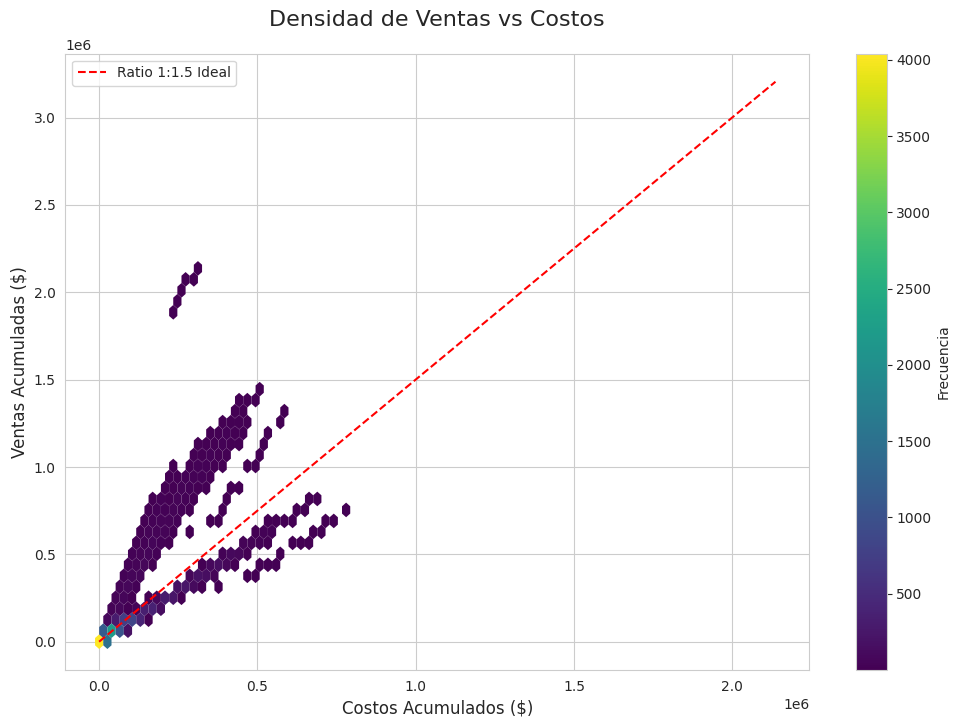

In [ ]:
plt.figure(figsize=(12, 8))
hexbin = plt.hexbin(df['CostosAcum'],
                    df['VentasAcum'],
                    gridsize=30,
                    cmap='viridis',
                    mincnt=1,
                    edgecolors='none')
plt.colorbar(hexbin, label='Frecuencia')
plt.title("Densidad de Ventas vs Costos", fontsize=16, pad=20)
plt.xlabel("Costos Acumulados ($)", fontsize=12)
plt.ylabel("Ventas Acumuladas ($)", fontsize=12)

# Añadir línea de eficiencia ideal
max_val = max(df['CostosAcum'].max(), df['VentasAcum'].max())
plt.plot([0, max_val], [0, max_val*1.5], 'r--', label='Ratio 1:1.5 Ideal')
plt.legend()

plt.savefig('hexbin_ventas_costos.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Create a 'Trimestre' column from the 'Period' column
# Assuming periods 1-3 are Q1, 4-6 are Q2, 7-9 are Q3, and 10-12 are Q4
# If your periods are different, you may need to adjust this logic.
def get_trimestre(period):
    if 1 <= period <= 3:
        return 'Q1'
    elif 4 <= period <= 6:
        return 'Q2'
    elif 7 <= period <= 9:
        return 'Q3'
    elif 10 <= period <= 12:
        return 'Q4'
    else:
        return 'Other' # Handle periods outside of 1-12 if necessary

df['Trimestre'] = df['Period'].apply(get_trimestre)

display(df.head())

,FiscalYear,Period,DayOfPeriod,Date,Depto,NameDept,VentasAcum,CostosAcum,IngresosAcum,MargenFinal%,DiaSemana,FinDeSemana,Año_Periodo,Trimestre
0,2019,1,1,2018-10-29,123,CARNICERIA,25582.8444,6224.7430,-178.1956,0.200765,0,0,2019-P1,Q1
1,2019,1,2,2018-10-30,123,CARNICERIA,52294.8960,12551.4116,-211.5061,0.200765,1,0,2019-P1,Q1
2,2019,1,3,2018-10-31,123,CARNICERIA,75989.9811,17472.1710,-445.8216,0.200765,2,0,2019-P1,Q1
3,2019,1,4,2018-11-01,123,CARNICERIA,101996.7774,23246.2604,-820.0995,0.200765,3,0,2019-P1,Q1
4,2019,1,5,2018-11-02,123,CARNICERIA,130852.2679,29349.9229,-1185.0055,0.200765,4,0,2019-P1,Q1


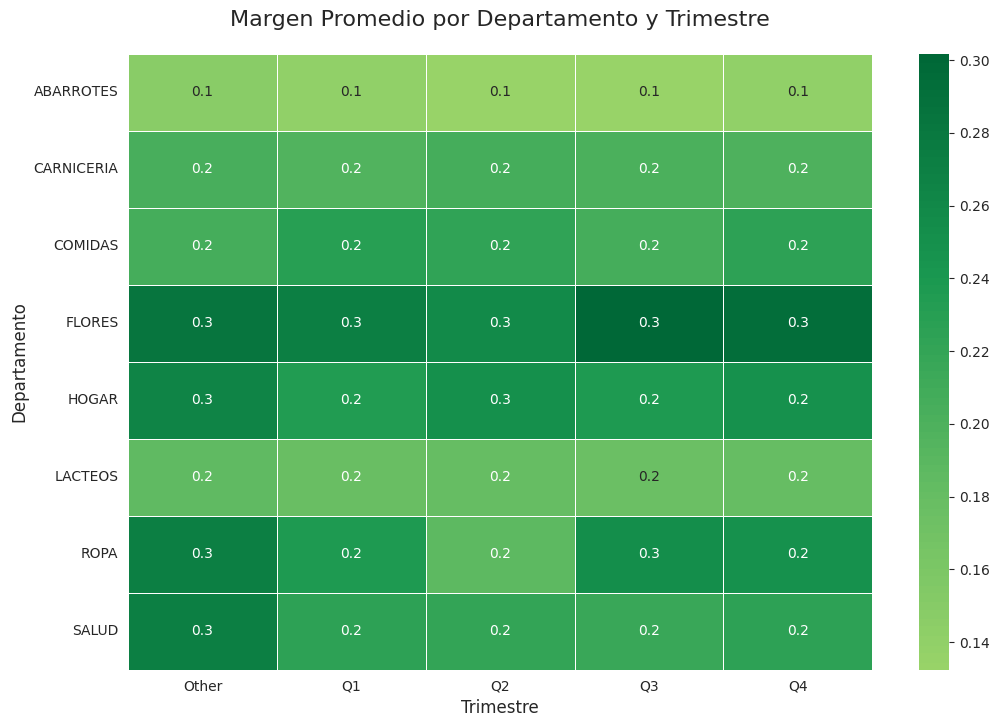

In [ ]:
pivot_table = df.pivot_table(values='MargenFinal%',
                            index='NameDept',
                            columns='Trimestre',
                            aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table,
            annot=True,
            fmt=".1f",
            cmap="RdYlGn",
            center=0,
            linewidths=0.5)
plt.title("Margen Promedio por Departamento y Trimestre", pad=20, fontsize=16)
plt.xlabel("Trimestre", fontsize=12)
plt.ylabel("Departamento", fontsize=12)
plt.savefig('heatmap_margen_trimestral.png', dpi=300, bbox_inches='tight')
plt.show()